In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_date'] = df['job_posted_date'].dt.date
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\foranac\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_Irl = df [(df['job_country'] == 'Ireland') & (df['job_title_short'] == 'Data Analyst')].dropna(subset='salary_year_avg').copy()   # should always dropna before exploding
df_DA_exp = df_DA_Irl.explode('job_skills')
df_DA_exp = df_DA_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_DA_exp = df_DA_exp.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
job_count = len(df_DA_Irl)
df_DA_exp['skill_perc'] = df_DA_exp['skill_count']/job_count*100
df_DA_exp = df_DA_exp[df_DA_exp['skill_count']>1]
df_DA_exp

,skill_count,median_salary,skill_perc
job_skills,,,
sql,11,98500.0,57.894737
tableau,9,80850.0,47.368421
r,8,100500.0,42.105263
python,6,104837.5,31.578947
power bi,5,72900.0,26.315789
azure,5,100500.0,26.315789
sas,4,86700.0,21.052632
excel,4,69175.0,21.052632
unreal,3,80850.0,15.789474


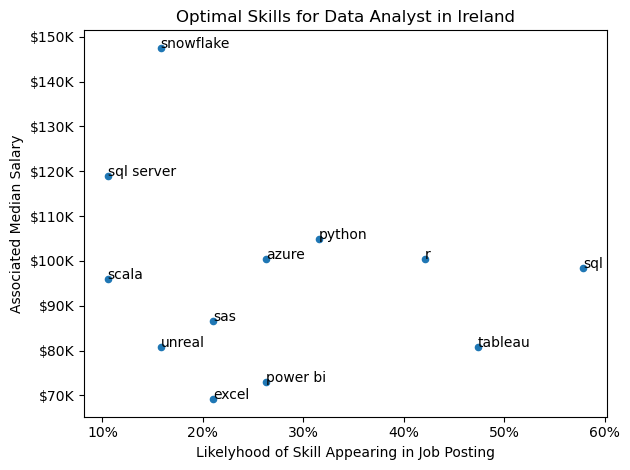

In [3]:
from adjustText import adjust_text
df_DA_exp.plot(kind='scatter', x='skill_perc', y='median_salary')
x = plt.FuncFormatter(lambda x, pos: f'{int(x)}%')
plt.gca().xaxis.set_major_formatter(x)
y = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(y)
plt.xlabel('Likelyhood of Skill Appearing in Job Posting')
plt.ylabel('Associated Median Salary')
plt.title('Optimal Skills for Data Analyst in Ireland')
texts = []
for i, txt in enumerate(df_DA_exp.index):
    texts.append(plt.text(df_DA_exp['skill_perc'].iloc[i], df_DA_exp['median_salary'].iloc[i],  txt))
    plt.tight_layout()





In [4]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [ ]:
df_tech = df['job_type_skills'].copy()
df_tech = df_tech.drop_duplicates()
df_tech = df_tech.dropna()
tech_dict = {}
for row in df_tech:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in tech_dict:
            tech_dict[key] += value
        else:
            tech_dict[key] = value
for key, value in tech_dict.items():
    tech_dict[key] = list(set(value))
tech_dict
#Context:
#You have a DataFrame df with a column 'job_type_skills'.
#Each entry in 'job_type_skills' appears to be a string representation of a dictionary (probably JSON-like), which contains skills and associated values.
#Step-by-step Explanation:
#Create a copy of the 'job_type_skills' column:
#
#python
#
#df_tech = df['job_type_skills'].copy()
#This creates a separate Series df_tech to work with, avoiding changes to the original DataFrame.
#Remove duplicate entries:
#
#python
#
#df_tech = df_tech.drop_duplicates()
#Ensures each unique string in 'job_type_skills' is processed only once.
#Remove missing values:
#
#python
#
#df_tech = df_tech.dropna()
#Filters out any NaN or missing entries.
#Initialize an empty dictionary to accumulate skills:
#
#python
#
#tech_dict = {}
#Iterate over each row in df_tech:
#
#python
#
#for row in df_tech:
#    row_dict = ast.literal_eval(row)
#    for key, value in row_dict.items():
#        if key in tech_dict:
#            tech_dict[key] += value
#        else:
#            tech_dict[key] = value
#ast.literal_eval(row) safely converts the string representation of a dictionary into an actual Python dictionary.
#
#For each key-value pair in this dictionary:
#
#If the key (skill) already exists in tech_dict, it adds the current value to the existing total.
#If not, it initializes that key with the current value.
#Result: tech_dict becomes a dictionary where each skill (key) maps to the sum of its values across all processed entries.
#
#Convert each list of values into a set to remove duplicates:
#
#python
#
#for key, value in tech_dict.items():
#    tech_dict[key] = list(set(value))
#This assumes that the value associated with each skill is iterable (like a list).
#
#Wrapping it with set() removes duplicate entries.
#
#Then converting back to list() makes it easier to work with later.
#
#Summary:
#The code processes unique, non-missing 'job_type_skills' entries.
#It parses each string into a dictionary.
#It aggregates (sums) the values for each skill across all entries.
#It ensures that for each skill, the associated list of values contains no duplicates.
#Note:
#The code assumes that each value in the dictionaries is iterable (like a list). If they are scalar numbers, then converting them into sets wouldn't make sense and might cause errors.
#If your data structure differs, you might need to adjust this logic accordingly.
#Let me know if you'd like further clarification or help adapting this code!

In [23]:
df_tech = pd.DataFrame(list(tech_dict.items()), columns= ['tech', 'skills'])
df_tech = df_tech.explode('skills')
df_plot = df_DA_exp.merge(df_tech, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_perc,tech,skills
0,11,98500.0,57.894737,programming,sql
1,9,80850.0,47.368421,analyst_tools,tableau
2,8,100500.0,42.105263,programming,r
3,6,104837.5,31.578947,programming,python
4,5,72900.0,26.315789,analyst_tools,power bi
5,5,100500.0,26.315789,cloud,azure
6,4,86700.0,21.052632,analyst_tools,sas
7,4,86700.0,21.052632,programming,sas
8,4,69175.0,21.052632,analyst_tools,excel
9,3,80850.0,15.789474,other,unreal


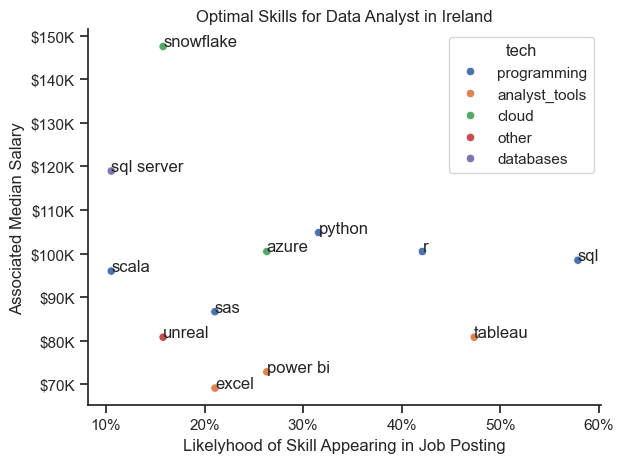

In [27]:
from adjustText import adjust_text
sns.scatterplot(
    data=df_plot,
    x = 'skill_perc',
    y = 'median_salary',
    hue='tech'
)
sns.set_theme(style='ticks')
sns.despine()
x = plt.FuncFormatter(lambda x, pos: f'{int(x)}%')
plt.gca().xaxis.set_major_formatter(x)
y = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(y)
plt.xlabel('Likelyhood of Skill Appearing in Job Posting')
plt.ylabel('Associated Median Salary')
plt.title('Optimal Skills for Data Analyst in Ireland')
texts = []
for i, txt in enumerate(df_DA_exp.index):
    texts.append(plt.text(df_DA_exp['skill_perc'].iloc[i], df_DA_exp['median_salary'].iloc[i],  txt))
    plt.tight_layout()
